In [1]:
import numpy as np
import pandas as pd
import json
from eventgraphs import EventGraph
import matplotlib.pyplot as plt

from glob import glob
from collections import defaultdict
import pickle
import networkx as nx

%pylab inline

Populating the interactive namespace from numpy and matplotlib


# CPE

In [5]:
home_dir = "C:\\Users\\matth\\Documents\\IMPERIAL\\PROJECT\\timestamped_data.csv"

df = pd.read_csv(home_dir)

In [15]:
dt_range = np.linspace(0,500, 101)

num_components = []
delta_range = []
density = []
largest_lst = []
number = []
avg_degree_lst = []
edges_lst =[]
mean_comp_lst=[]
average_diff_lst=[]
average_length_lst=[]
num_edges = []

from statistics import mean


for delta in dt_range:
    if delta == 0:
        continue
    delta_range.append(int(delta))
    EG = EventGraph.from_pandas_eventlist(df, graph_rules='teg')
    EG.event_graph_rules['delta_cutoff'] = int(delta)
    EG.build(verbose=False)
    EG.calculate_edge_motifs() # in order to include_graph_data
    nx_eg = EG.create_networkx_event_graph(include_graph_data=True)
    
    #calculates the number of components of the EG for each delta-t
    num_components.append(nx.number_weakly_connected_components(nx_eg))
    
    
    #calculates the total number of events for each delta-t
    density.append(nx.density(nx_eg))
    
    #calculates the total number of edges
    num_edges.append(len(nx_eg.edges))
    
    # calculates largest component
    components = nx.weakly_connected_components(nx_eg)
    largest = len(max(components, key=len))
    largest_lst.append(largest)
    
    # average size of components
    
    lst_of_components_sizes = [len(c) for c in sorted(nx.weakly_connected_components(nx_eg),key=len, reverse=True)]
    lst_of_components = [c for c in sorted(nx.weakly_connected_components(nx_eg),key=len, reverse=True)]
    mean = mean(lst_of_components_sizes)
    mean_comp_lst.append(mean)
    
    #number of edges 
    edges = len(nx_eg.edges())
    edges_lst.append(edges)

    diff_lst = []
    length_lst = []
    singleton_count = 0

    
    
    for elm in lst_of_components:
        #store as list and create a subgraph of the component
        elm_lst = list(elm)
        sub = nx_eg.subgraph(elm)


        #calculate the longest path and the sum of its edge weights
        longest_path = nx.dag_longest_path(sub, weight='delta')
        length = nx.dag_longest_path_length(sub, weight='delta')

        #calculates the difference between the max and min event times
        time_lst = []
        for event in elm_lst:
            time = df.iloc[event]['time']
            time_lst.append(time)

        max_time = max(time_lst)
        min_time = min(time_lst)

        diff = max_time - min_time

        if diff !=0:
            diff_lst.append(diff)

        if length != 0:
            length_lst.append(length)
        else:
            singleton_count +=1


    from statistics import mean
    average_length = int(mean(length_lst))
    average_diff = int(mean(diff_lst))
    
    average_length_lst.append(average_length)
    average_diff_lst.append(average_diff)
    
    
    
#Normalise
norm_num_components = [float(i)/sum(num_components) for i in num_components]
norm_density = [round(float(i)/sum(density), 4) for i in density]
norm_largest_lst = [float(i)/sum(largest_lst) for i in largest_lst]
norm_mean_comp_lst = [float(i)/sum(mean_comp_lst) for i in mean_comp_lst]
norm_edges_lst = [round(float(i)/sum(edges_lst), 4) for i in edges_lst]
norm_average_length_lst = [float(i)/sum(average_length_lst) for i in average_length_lst]
norm_average_diff_lst = [float(i)/sum(average_diff_lst) for i in average_diff_lst]
norm_num_edges = [float(i)/sum(num_edges) for i in num_edges]

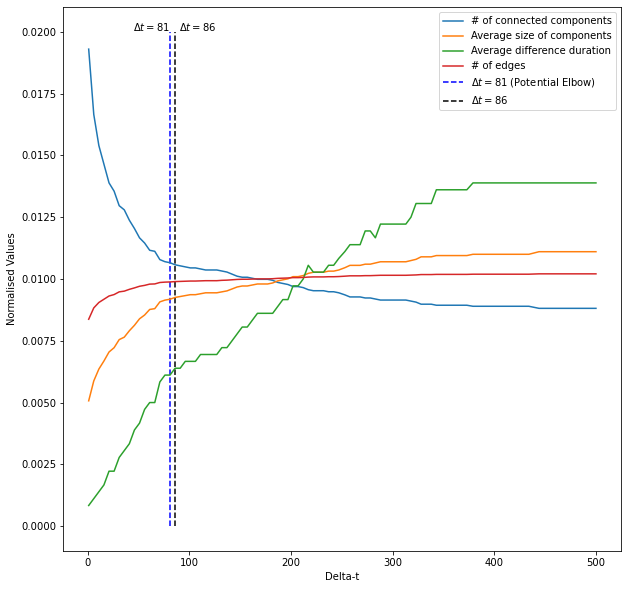

In [7]:
plt.figure(figsize=(10,10))

plt.plot(delta_range, norm_num_components, label='# of connected components')


#plt.plot(delta_range, norm_edges_lst, label='density')
plt.plot(delta_range, norm_mean_comp_lst, label='Average size of components')

#plt.plot(delta_range, norm_average_length_lst, label='Average length duration')
plt.plot(delta_range, norm_average_diff_lst, label='Average difference duration')

plt.plot(delta_range, norm_num_edges, label='# of edges')

plt.vlines(81,0,0.02, alpha=1, linestyle='--', color='blue', label='$\Delta t=81$ (Potential Elbow)')
plt.text(45, 0.02005, r"$\Delta t=81$")

plt.vlines(86,0,0.02, alpha=1, linestyle='--', color='k', label='$\Delta t=86$')
plt.text(90, 0.02005, r"$\Delta t=86$")

plt.legend()
plt.xlabel('Delta-t')
plt.ylabel('Normalised Values')

plt.show()

https://www.kaggle.com/kevinarvai/knee-elbow-point-detection

reference

Finding a “Kneedle” in a Haystack: Detecting Knee Points in System Behavior Ville Satopa † , Jeannie Albrecht† , David Irwin‡ , and Barath Raghavan§ †Williams College, Williamstown, MA ‡University of Massachusetts Amherst, Amherst, MA § International Computer Science Institute, Berkeley, CA

In [ ]:
from kneed import KneeLocator

In [ ]:
kneedle = KneeLocator(x=delta_range, y=norm_num_components, S=1, curve='convex', direction='decreasing')

print(f'The elbow for the "# of connected components":', round(kneedle.elbow, 3))


In [ ]:
kneedle = KneeLocator(x=delta_range, y=norm_mean_comp_lst, S=1, curve='concave', direction='increasing')

print(f'The knee for "Average size of components":', round(kneedle.knee, 3))

In [ ]:
kneedle = KneeLocator(x=delta_range, y=norm_num_edges, S=1, curve='concave', direction='increasing')

print(f'The Knee for "# of edges":', round(kneedle.knee, 3))

In [ ]:
kneedle = KneeLocator(x=delta_range, y=norm_average_diff_lst, S=1, curve='concave', direction='increasing')

print(f'The knee for "the Average difference duration":', round(kneedle.knee, 3))

In [ ]:
x=71 + 86 + 71 + 96

In [ ]:
x/4

# COVID

In [2]:
df = pd.read_csv('./covid_timestamped_data.csv')

In [3]:
dt_range = np.linspace(1,50, 50)

num_components = []
delta_range = []
density = []
largest_lst = []
number = []
avg_degree_lst = []
edges_lst =[]
mean_comp_lst=[]
average_diff_lst=[]
average_length_lst=[]
num_edges = []

from statistics import mean

for delta in dt_range:
    delta_range.append(int(delta))
    EG = EventGraph.from_pandas_eventlist(df, graph_rules='teg')
    EG.event_graph_rules['delta_cutoff'] = int(delta)
    EG.build(verbose=False)
    EG.calculate_edge_motifs() # in order to include_graph_data
    nx_eg = EG.create_networkx_event_graph(include_graph_data=True)
    
    #calculates the number of components of the EG for each delta-t
    num_components.append(nx.number_weakly_connected_components(nx_eg))
    
    
    #calculates the total number of events for each delta-t
    density.append(nx.density(nx_eg))
    
    #calculates the total number of edges
    num_edges.append(len(nx_eg.edges))
    
    # calculates largest component
    components = nx.weakly_connected_components(nx_eg)
    largest = len(max(components, key=len))
    largest_lst.append(largest)
    
    # average size of components
    
    lst_of_components_sizes = [len(c) for c in sorted(nx.weakly_connected_components(nx_eg),key=len, reverse=True)]
    lst_of_components = [c for c in sorted(nx.weakly_connected_components(nx_eg),key=len, reverse=True)]
    mean = mean(lst_of_components_sizes)
    mean_comp_lst.append(mean)
    
    #number of edges 
    edges = len(nx_eg.edges())
    edges_lst.append(edges)

    diff_lst = []
    length_lst = []
    singleton_count = 0
    
    print(delta)

    for elm in lst_of_components:
        #store as list and create a subgraph of the component
        elm_lst = list(elm)
        sub = nx_eg.subgraph(elm)


        #calculate the longest path and the sum of its edge weights
        longest_path = nx.dag_longest_path(sub, weight='delta')
        length = nx.dag_longest_path_length(sub, weight='delta')

        #calculates the difference between the max and min event times
        time_lst = []
        for event in elm_lst:
            time = df.iloc[event]['time']
            time_lst.append(time)

        max_time = max(time_lst)
        min_time = min(time_lst)

        diff = max_time - min_time

        if diff !=0:
            diff_lst.append(diff)

        if length != 0:
            length_lst.append(length)
        else:
            singleton_count +=1


    from statistics import mean
    average_length = int(mean(length_lst))
    average_diff = int(mean(diff_lst))
    
    average_length_lst.append(average_length)
    average_diff_lst.append(average_diff)
    
    
    
#Normalise
norm_num_components = [float(i)/sum(num_components) for i in num_components]
norm_density = [round(float(i)/sum(density), 4) for i in density]
norm_largest_lst = [float(i)/sum(largest_lst) for i in largest_lst]
norm_mean_comp_lst = [float(i)/sum(mean_comp_lst) for i in mean_comp_lst]
norm_edges_lst = [round(float(i)/sum(edges_lst), 4) for i in edges_lst]
norm_average_length_lst = [float(i)/sum(average_length_lst) for i in average_length_lst]
norm_average_diff_lst = [float(i)/sum(average_diff_lst) for i in average_diff_lst]
norm_num_edges = [float(i)/sum(num_edges) for i in num_edges]

1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
21.0
22.0
23.0
24.0
25.0
26.0
27.0
28.0
29.0
30.0
31.0
32.0
33.0
34.0
35.0
36.0
37.0
38.0
39.0
40.0
41.0
42.0
43.0
44.0
45.0
46.0
47.0
48.0
49.0
50.0


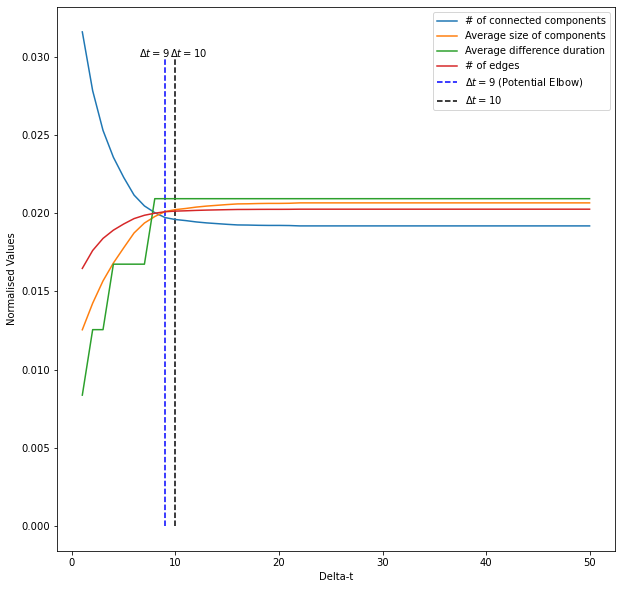

In [4]:
plt.figure(figsize=(10,10))

plt.plot(delta_range, norm_num_components, label='# of connected components')


#plt.plot(delta_range, norm_edges_lst, label='density')
plt.plot(delta_range, norm_mean_comp_lst, label='Average size of components')

#plt.plot(delta_range, norm_average_length_lst, label='Average length duration')
plt.plot(delta_range, norm_average_diff_lst, label='Average difference duration')

plt.plot(delta_range, norm_num_edges, label='# of edges')

plt.vlines(9,0,0.03, alpha=1, linestyle='--', color='blue', label='$\Delta t=9$ (Potential Elbow)')
plt.text(6.5, 0.03, r"$\Delta t=9$")

plt.vlines(10,0,0.03, alpha=1, linestyle='--', color='k', label='$\Delta t=10$')
plt.text(9.5, 0.03, r"$\Delta t=10$")

plt.legend()
plt.xlabel('Delta-t')
plt.ylabel('Normalised Values')

plt.show()

In [14]:
from kneed import KneeLocator

In [23]:
kneedle = KneeLocator(x=delta_range, y=norm_num_components, S=1.0, curve='convex', direction='decreasing')

print(f'The elbow for the "# of connected components":', round(kneedle.elbow, 3))

The elbow for the "# of connected components": 9


In [22]:
kneedle = KneeLocator(x=delta_range, y=norm_mean_comp_lst, S=1.0, curve='concave', direction='increasing')

print(f'The knee for "Average size of components":', round(kneedle.knee, 3))

The knee for "Average size of components": 9


In [24]:
kneedle = KneeLocator(x=delta_range, y=norm_num_edges, S=1.0, curve='concave', direction='increasing')

print(f'The Knee for "# of edges":', round(kneedle.knee, 3))

The Knee for "# of edges": 9


In [25]:
kneedle = KneeLocator(x=delta_range, y=norm_average_diff_lst, S=1.0, curve='concave', direction='increasing')

print(f'The knee for "the Average difference duration":', round(kneedle.knee, 3))

The knee for "the Average difference duration": 4
